In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format


In [2]:
nyc_crime = pd.read_excel('crime_data_new_york_by_city_2013.xls', skiprows = 4, skip_footer=3)

In [148]:
nyc_crime.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [29]:
nyc_crime.tail()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
343,Woodbury Town,10685,3,0,nan,0,2,1,541,9,529,3,nan
344,Woodridge Village,829,7,0,nan,0,0,7,17,8,9,0,0.000
345,Woodstock Town,5931,2,0,nan,0,0,2,58,13,45,0,nan
346,Yonkers,199134,1036,6,nan,25,390,615,2368,470,1662,236,10.000
347,Yorktown Town,36643,15,0,nan,0,2,13,334,45,287,2,nan


In [30]:
nyc_crime.shape

(348, 13)

In this dataset, we have 348 rows and 13 columns.

The column names need to be changed in this dataset.

In [31]:
nyc_crime.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [3]:
nyc_crime.rename(columns={'Murder and\nnonnegligent\nmanslaughter':'murder_nonnegligent_manslaughter'
                          ,'Rape\n(revised\ndefinition)1':'rape_revised_definition1'
                          ,'Rape\n(legacy\ndefinition)2':'rape_legacy_definition2'
                          ,'Aggravated\nassault':'assault'
                          ,'Property\ncrime':'property_crime'
                          ,'Larceny-\ntheft': 'larceny_theft'
                          ,'Violent\ncrime' : 'violent_crime'
                          , 'Motor\nvehicle\ntheft': 'Motor_vehicle_theft'}
                 , inplace=True)

In [4]:
nyc_crime.columns = nyc_crime.columns.str.lower()

In [5]:
nyc_crime.columns

Index(['city', 'population', 'violent_crime',
       'murder_nonnegligent_manslaughter', 'rape_revised_definition1',
       'rape_legacy_definition2', 'robbery', 'assault', 'property_crime',
       'burglary', 'larceny_theft', 'motor_vehicle_theft', 'arson3'],
      dtype='object')

The column 'rape_revised_definition1' seems to have all null values.

In [6]:
nyc_crime['rape_revised_definition1'].isnull().value_counts()

True    348
Name: rape_revised_definition1, dtype: int64

In [108]:
nyc_crime.isnull().sum()

city                                  0
population                            0
violent_crime                         0
murder_nonnegligent_manslaughter      0
rape_revised_definition1            348
rape_legacy_definition2               0
robbery                               0
assault                               0
property_crime                        0
burglary                              0
larceny_theft                         0
motor_vehicle_theft                   0
arson3                              161
dtype: int64

So we can drop the column 'rape_revised_definition1'. And since we will have only one column related to word 'rape', we can rename our column  'rape_legacy_definition2' to a shorter name say 'rape'.

In [7]:
nyc_crime.drop('rape_revised_definition1', axis= 1, inplace=True)
nyc_crime.rename(columns={'rape_legacy_definition2':'rape',
                         'murder_nonnegligent_manslaughter':'murder'}
                , inplace=True)

In [38]:
nyc_crime.head()

,city,population,violent_crime,murder_nonnegligent_manslaughter,rape,robbery,assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,nan


In [138]:
print(nyc_crime[['robbery','murder','population','property_crime']].describe())

        robbery  murder  population  property_crime
count   348.000 348.000     348.000         348.000
mean     72.902   1.566   40037.632         792.606
std    1031.033  18.304  450037.368        7659.725
min       0.000   0.000     526.000           0.000
25%       0.000   0.000    3003.000          40.500
50%       1.000   0.000    7233.500         112.500
75%       5.000   0.000   18427.500         341.000
max   19170.000 335.000 8396126.000      141971.000


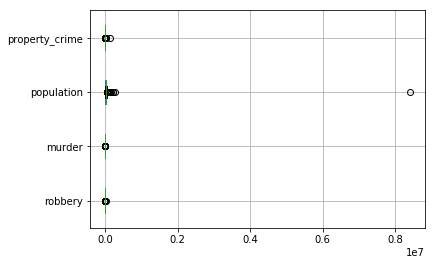

In [157]:
nyc_crime[['robbery','murder','population','property_crime']].boxplot(vert=False)
plt.show()

In [10]:
'''print('Data falling below 1 percentile : ')
print(nyc_crime[nyc_crime.population < np.percentile(nyc_crime.population,1)]['population'])
print()
print('Data falling above 99th percentile : ')
print(nyc_crime[nyc_crime.population > np.percentile(nyc_crime.population,99)]['population'])

stats.mstats.winsorize(nyc_crime.population, limits=0.01, inplace= True)'''


"print('Data falling below 1 percentile : ')\nprint(nyc_crime[nyc_crime.population < np.percentile(nyc_crime.population,1)]['population'])\nprint()\nprint('Data falling above 99th percentile : ')\nprint(nyc_crime[nyc_crime.population > np.percentile(nyc_crime.population,99)]['population'])\n\nstats.mstats.winsorize(nyc_crime.population, limits=0.01, inplace= True)"

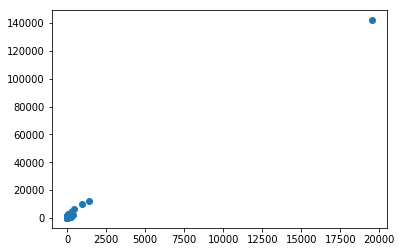

In [13]:
nyc_crime['mur_rob'] = nyc_crime.robbery + nyc_crime.murder
plt.scatter(x = nyc_crime.mur_rob , y = nyc_crime.property_crime)
plt.show()

In [14]:
df_wide = nyc_crime[['robbery','property_crime','murder','population','mur_rob']]
df_long = pd.melt(df_wide, id_vars = 'property_crime')

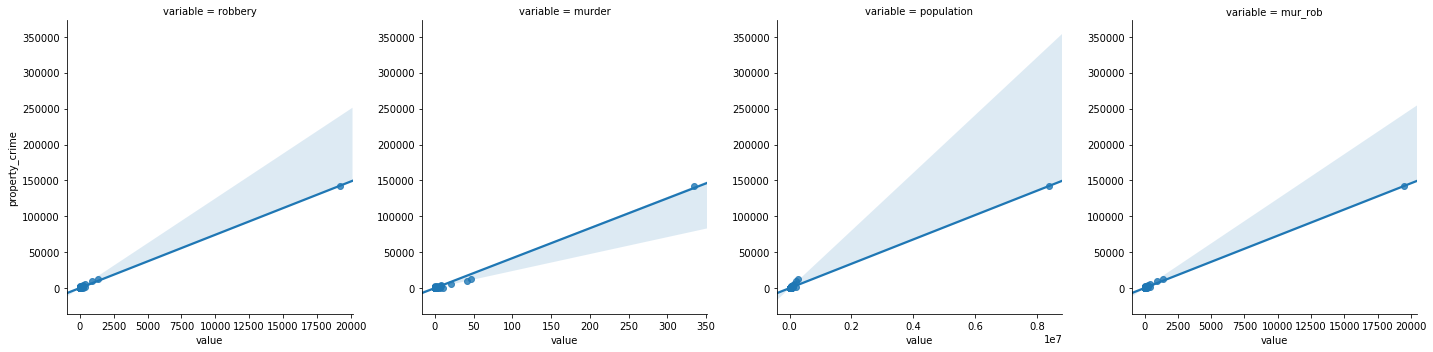

In [15]:
sns.lmplot(data = df_long,  x= 'value', y='property_crime', col= 'variable', sharex=False )
plt.show()

In [135]:
nyc_crime.head(1)

,city,population,violent_crime,murder,rape,robbery,assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.000


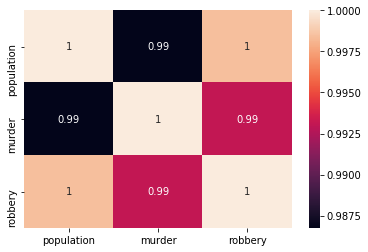


Coefficients: 
 [  1.21875569e-02   2.28489351e+02  -1.92388628e+00]

Intercept: 
 87.0657977082

R-squared:
0.998370820591


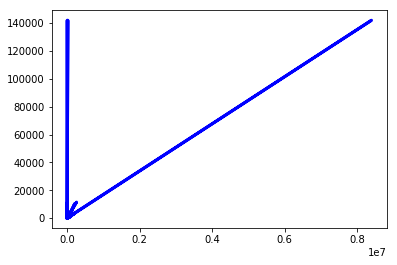

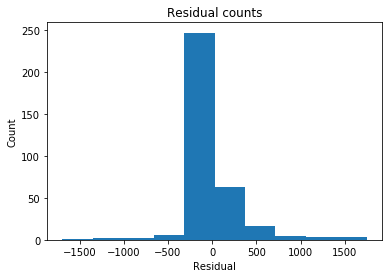

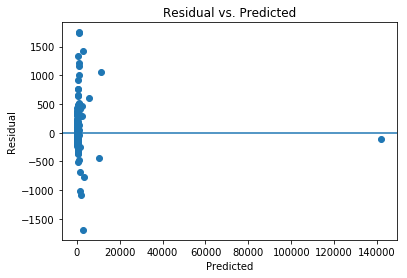

In [9]:
regr = linear_model.LinearRegression()
y = nyc_crime['property_crime']
x = nyc_crime[['population', 'murder','robbery']]

sns.heatmap(x.corr(), annot=True)
plt.show()

regr.fit(x, y)
predicted = regr.predict(x)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()


predicted = regr.predict(x).ravel()
actual = nyc_crime['property_crime']
# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [16]:
nyc_crime[nyc_crime.population == 8396126]

,city,population,violent_crime,murder,rape,robbery,assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3,mur_rob
216,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434,nan,19505


In [19]:
nyc_crime = nyc_crime[nyc_crime.population != 8396126]

In [20]:
nyc_crime['population2'] = nyc_crime.population * nyc_crime.population

In [21]:
nyc_crime['murder_cat'] = np.where(nyc_crime.murder >= 1 , 1, 0)
nyc_crime['robbery_cat'] = np.where(nyc_crime.robbery >= 1 , 1, 0)

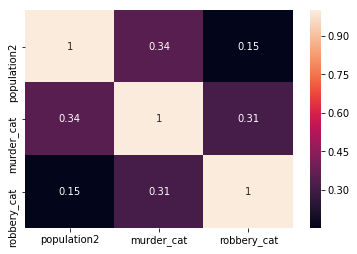


Coefficients: 
 [  1.70507593e-07   3.71055955e+02   2.13004398e+02]

Intercept: 
 38.651340454

R-squared:
0.828258821889


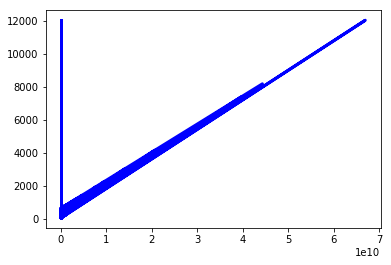

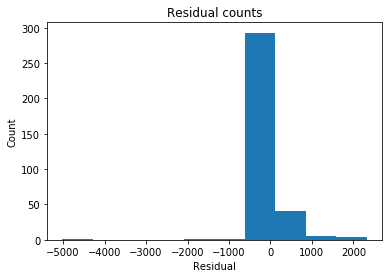

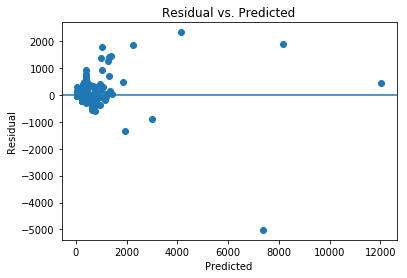

In [23]:
regr = linear_model.LinearRegression()
y = nyc_crime['property_crime']
x = nyc_crime[['population2', 'murder_cat','robbery_cat']]

sns.heatmap(x.corr(), annot=True)
plt.show()

regr.fit(x, y)
predicted = regr.predict(x)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()


predicted = regr.predict(x).ravel()
actual = nyc_crime['property_crime']
# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
